In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 10
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('alphaeffect.xlsx', sheet_name='heatmap')

In [3]:
repairs = data[['Alpha','Alpha = 0', 'Alpha = 0.25', 'Alpha = 0.5','Alpha = 0.75', 'Alpha = 1']]
costs = data[['Alpha', 'Alpha = 0 c', 'Alpha = 0.25 c', 'Alpha = 0.5 c','Alpha = 0.75 c', 'Alpha = 1 c']]

In [4]:
repairs = repairs.rename({'Alpha': 'Bridge ID','Alpha = 0': '0', 'Alpha = 0.25':'0.25',
                          'Alpha = 0.5':'0.5','Alpha = 0.75': '0.75',
                          'Alpha = 1':'1'}, axis = 1)

costs = costs.rename({'Alpha': 'Bridge_ID','Alpha = 0 c': '0', 'Alpha = 0.25 c':'0.25',
                      'Alpha = 0.5 c':'0.5','Alpha = 0.75 c': '0.75',
                      'Alpha = 1 c':'1'}, axis = 1)
repairs['Bridge ID'] = [5, 12, 15]
repairs.set_index('Bridge ID', inplace=True)
costs['Bridge ID'] = [5, 12, 15]
costs.set_index('Bridge ID', inplace=True)
costs.drop('Bridge_ID', axis =1, inplace = True)

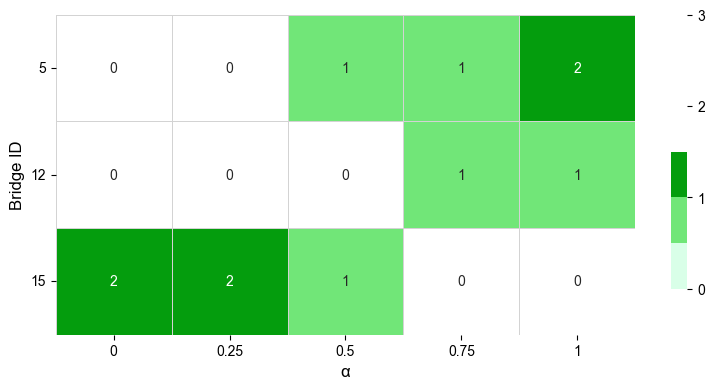

In [5]:
# Create a colormap with your custom colors
colors = ["#FFFFFF", "#D9FFE8", "#71E678", "#049D0D"]
n_bins = 4
cmap = LinearSegmentedColormap.from_list('Custom', colors, N=n_bins)

plt.figure(figsize = (8,4))
# Create the heatmap
ax = sns.heatmap(repairs, cmap=cmap, annot=True, linewidths=.4,\
                 linecolor = 'lightgrey', cbar_kws={"ticks": [0.5, 1.5, 2.5, 3.5]})

# Modify the colorbar
cbar = ax.collections[0].colorbar
cbar.set_ticks([0.5, 1.5, 2.5, 3.5])
cbar.set_ticklabels([0, 1, 2, 3])

# Rotate the y-axis labels to be horizontal
ax.set_xlabel('α', family='Arial', fontsize = 12)
ax.set_ylabel('Bridge ID', family='Arial', fontsize = 12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, family='Arial')
ax.set_xticklabels(ax.get_xticklabels(), family='Arial')

plt.tight_layout()
plt.savefig('Number_repairs.jpg', dpi = 300)

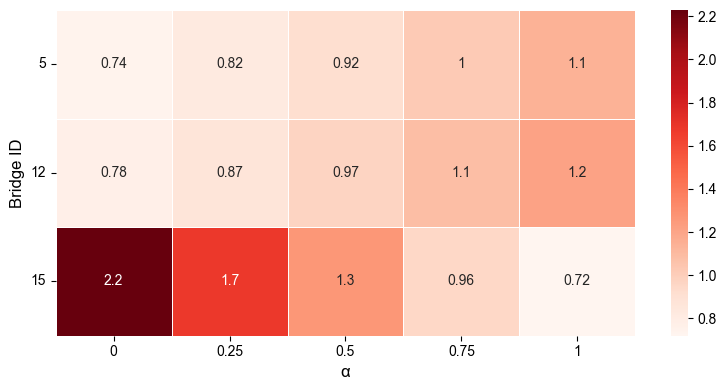

In [6]:
# Create a colormap with your custom colors
colors = ["#FFFFFF", "#E89289", "#BD3E31", "#8B0F02"]
n_bins = 4
# cmap = LinearSegmentedColormap.from_list('Custom', colors, N=n_bins)

plt.figure(figsize = (8,4))
# Create the heatmap
ax = sns.heatmap(costs, cmap = 'Reds', annot=True, linewidths=.5)

# Modify the colorbar
# cbar = ax.collections[0].colorbar
# cbar.set_ticks([0.5, 1.5, 2.5, 3.5])
# cbar.set_ticklabels([0, 1, 2, 3])

# Rotate the y-axis labels to be horizontal
ax.set_xlabel('α', family='Arial', fontsize = 12)
ax.set_ylabel('Bridge ID', family='Arial', fontsize = 12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, family='Arial')
ax.set_xticklabels(ax.get_xticklabels(), family='Arial')

plt.tight_layout()
plt.savefig('costs.jpg', dpi = 300)